### Test Simple resistor coupling

In [6]:
from simulator import *
from Ionic_current.Ord11 import Ord11_model
from PermanentConstants import Constants
import torch
from model import ResNet1D

device = torch.device('cpu')
dtype = torch.float32
const = Constants(
            device=device,
            dtype=dtype,
            Ncell=50,
            bcl=1000,
            nbeats=3,
            dt_factor=10,
            stim_amplitude=50,
            GJ_coupling=7.35e-4
            )
D = 0.1 # mm^2/msec
dx = 0.1 #mm    
Ctot = const.parameters['Ctot']
Ggap = Ctot * D / dx**2
model = ResNet1D(in_channels=1,out_channels=1)
coupling = ResistorCoupling(const.parameters['Ncell'], Ggap, device=device, dtype=dtype)
sim = CableSimulator(const, coupling, Ord11_model_fn=Ord11_model, device=device, dtype=dtype)

t_save, phi_save, I_save = sim.run()

time: 1000.00 ms, dt=0.001
time: 2000.00 ms, dt=0.001
Simulation time: 887.71 seconds


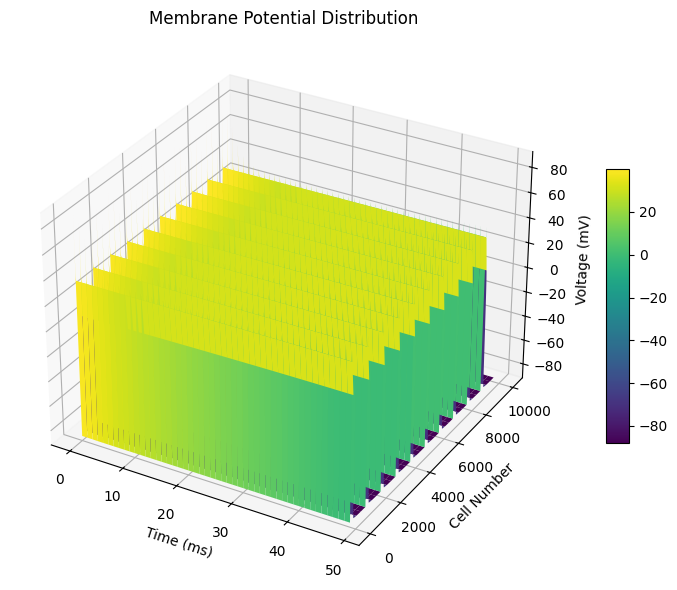

In [ ]:
from Plot import Plot_fn

Plot_fn.plot_2D_map(t_save, phi_save, title='Membrane Potential Distribution', xlabel='Time (ms)', ylabel='Cell Number', zlabel='Voltage (mV)')
# save_path = "/home/richard/PythonCode/Train-CNN/SingleGJData/"
# dic = {"phi_save": phi_save.cpu().numpy(), "t_save": t_save.cpu().numpy(),
#        "I_gap_save": I_cleft.cpu().numpy()}
# torch.save(dic, save_path + "SingleGJ_adap.pt")

In [ ]:
coupling = ResNetSimpleCoupling(const.parameters['Ncell'], Ggap, 24, model, model_name='ResNet', if_normalize=True, device=device, dtype=dtype)
sim = CableSimulator(const, coupling, Ord11_model_fn=Ord11_model, device=device, dtype=dtype)
t_save, phi_save, I_save = sim.run()

time: 0.00 ms, dt=0.001
Simulation time: 1130.14 seconds


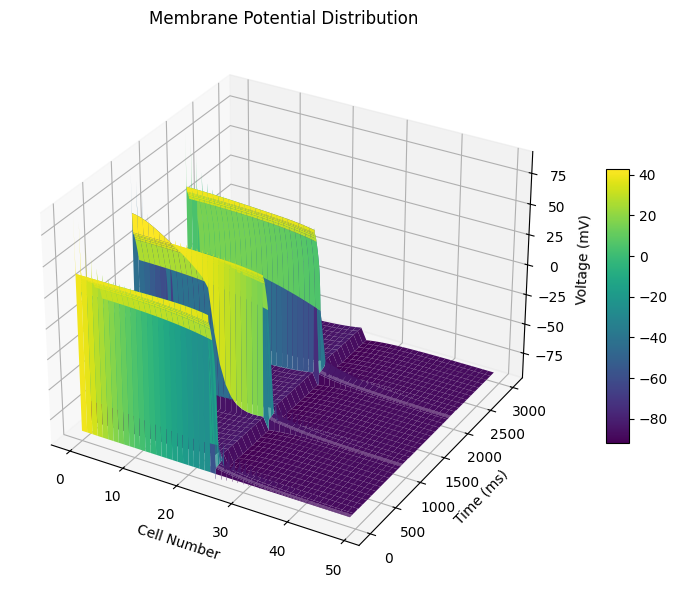

In [5]:
from Plot import Plot_fn

Plot_fn.plot_2D_map(t_save, phi_save, title='Membrane Potential Distribution', xlabel='Cell Number', ylabel='Time (ms)', zlabel='Voltage (mV)')

## MLP surrogate single GJ

In [3]:
from simulator import *
from Ionic_current.Ord11 import Ord11_model
from PermanentConstants import Constants
import torch
from model import MLP

device = torch.device('cpu')
dtype = torch.float32
const = Constants(
            device=device,
            dtype=dtype,
            Ncell=50,
            bcl=1000,
            nbeats=3,
            dt_factor=10,
            stim_amplitude=50,
            GJ_coupling=7.35e-4
            )
D = 0.1 # mm^2/msec
dx = 0.1 #mm    
Ctot = const.parameters['Ctot']
Ggap = Ctot * D / dx**2
model = mymodel = MLP(input_dim=2, hidden_dims=[32,32], output_dim=1)
coupling = MLPSimpleCoupling(const.parameters['Ncell'], Ggap, 24, model, model_name='MLP', device=device, dtype=dtype)
sim = CableSimulator(const, coupling, Ord11_model_fn=Ord11_model, device=device, dtype=dtype)
t_save, phi_save, I_save = sim.run()

time: 1000.00 ms, dt=0.001
time: 2000.00 ms, dt=0.001
Simulation time: 924.99 seconds


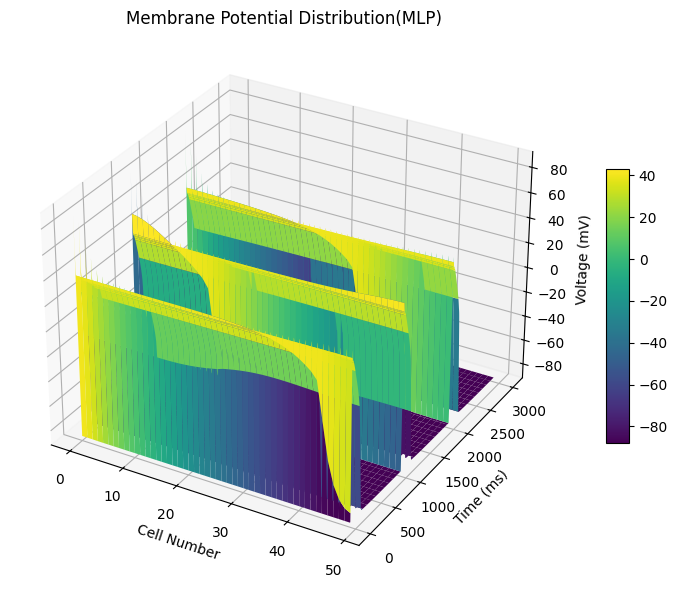

In [4]:
from Plot import Plot_fn

Plot_fn.plot_2D_map(t_save, phi_save, title='Membrane Potential Distribution(MLP)', xlabel='Cell Number', ylabel='Time (ms)', zlabel='Voltage (mV)')

### MLP multiple GJ

In [5]:
from simulator import *
from Ionic_current.Ord11 import Ord11_model
from PermanentConstants import Constants
import torch
from model import MLP

device = torch.device('cpu')
dtype = torch.float32
const = Constants(
            device=device,
            dtype=dtype,
            Ncell=50,
            bcl=1000,
            nbeats=3,
            dt_factor=10,
            stim_amplitude=50,
            GJ_coupling=7.35e-4
            )
D = 0.1 # mm^2/msec
dx = 0.1 #mm    
Ctot = const.parameters['Ctot']
Ggap = Ctot * D / dx**2
model = mymodel = MLP(input_dim=2, hidden_dims=[32,32], output_dim=1)
coupling = MLPSimpleCoupling(const.parameters['Ncell'], Ggap, 12, model, model_name='MLP', device=device, dtype=dtype)
sim = CableSimulator(const, coupling, Ord11_model_fn=Ord11_model, device=device, dtype=dtype)
t_save, phi_save, I_save = sim.run()

time: 1000.00 ms, dt=0.001
time: 2000.00 ms, dt=0.001
Simulation time: 1146.80 seconds


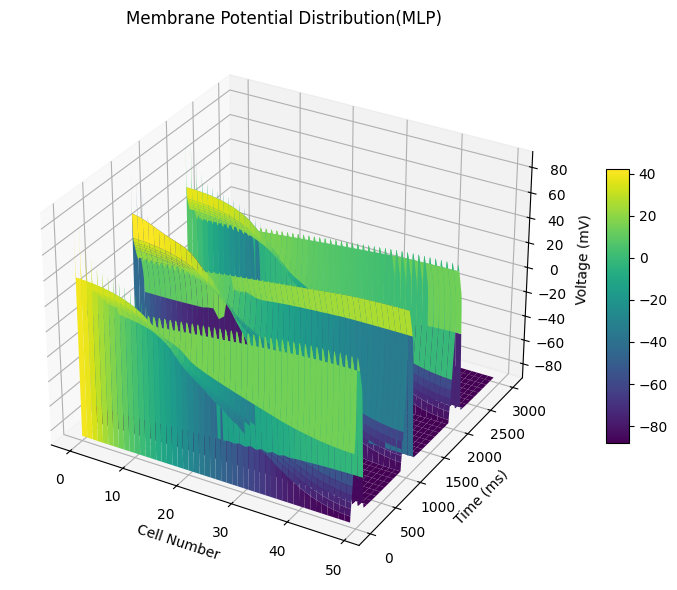

In [6]:
from Plot import Plot_fn

Plot_fn.plot_2D_map(t_save, phi_save, title='Membrane Potential Distribution(MLP)', xlabel='Cell Number', ylabel='Time (ms)', zlabel='Voltage (mV)')

time: 1000.00 ms, dt=0.001
time: 2000.00 ms, dt=0.001
Simulation time: 758.86 seconds


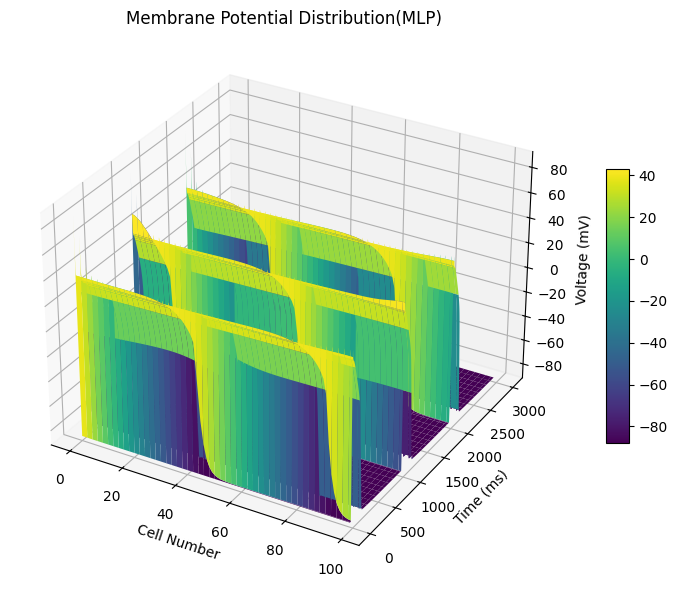

In [ ]:
from simulator import *
from Ionic_current.Ord11 import Ord11_model
from PermanentConstants import Constants
import torch
from model import MLP
from Plot import Plot_fn

device = torch.device('cpu')
dtype = torch.float64
const = Constants(
            device=device,
            dtype=dtype,
            Ncell=100,
            bcl=1000,
            nbeats=3,
            dt_factor=10,
            stim_amplitude=50,
            GJ_coupling=7.35e-4
            )
D = 0.1 # mm^2/msec
dx = 0.1 #mm    
Ctot = const.parameters['Ctot']
Ggap = Ctot * D / dx**2
model = mymodel = MLP(input_dim=2, hidden_dims=[32,32], output_dim=1)
coupling = MLPSimpleCoupling(const.parameters['Ncell'], Ggap, 49, model, model_name='MLP', device=device, dtype=dtype)
sim = CableSimulator(const, coupling, Ord11_model_fn=Ord11_model, device=device, dtype=dtype)
t_save, phi_save, I_save = sim.run()

Plot_fn.plot_2D_map(t_save, phi_save, title='Membrane Potential Distribution(MLP)', xlabel='Cell Number', ylabel='Time (ms)', zlabel='Voltage (mV)')

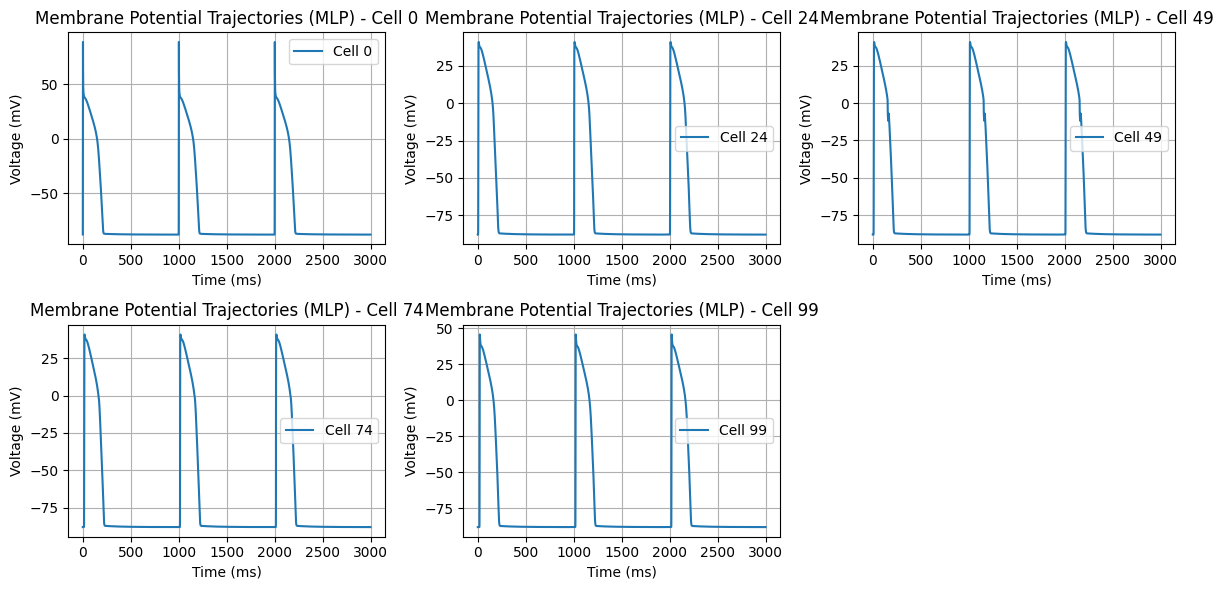

In [13]:
Plot_fn.plot_trajectory(t_save, phi_save, idx=[0, 24, 49, 74, 99], title='Membrane Potential Trajectories (MLP)', xlabel='Time (ms)', ylabel='Voltage (mV)')

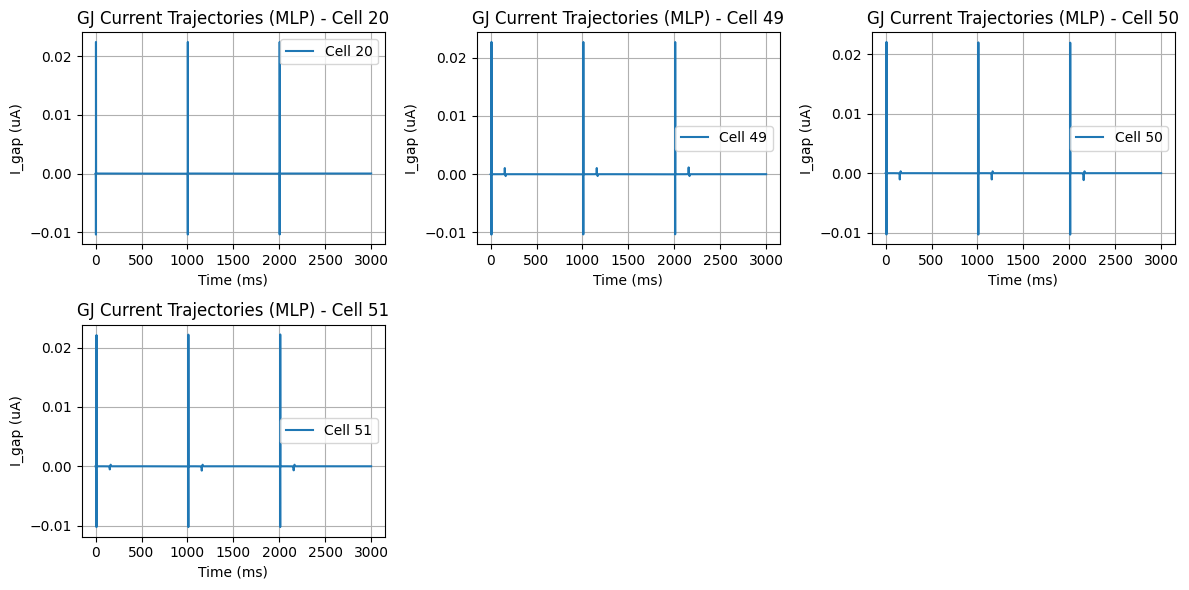

In [19]:
Plot_fn.plot_trajectory(t_save, I_save, idx = [20, 49, 50, 51], title='GJ Current Trajectories (MLP)', xlabel='Time (ms)', ylabel='I_gap (uA)')

### Test PIMLP 1 GJ

time: 1000.00 ms, dt=0.001
time: 2000.00 ms, dt=0.001
Simulation time: 760.99 seconds


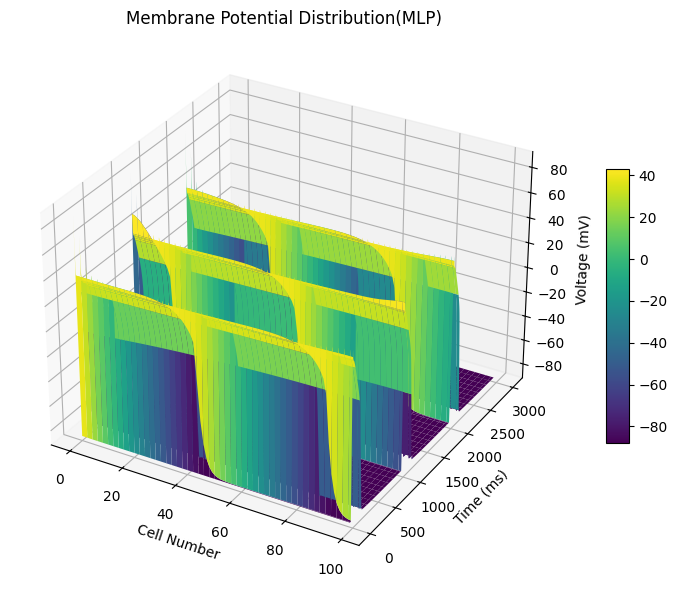

In [1]:
from simulator import *
from Ionic_current.Ord11 import Ord11_model
from PermanentConstants import Constants
import torch
from model import PIMLP
from Plot import Plot_fn

device = torch.device('cpu')
dtype = torch.float64
const = Constants(
            device=device,
            dtype=dtype,
            Ncell=100,
            bcl=1000,
            nbeats=3,
            dt_factor=10,
            stim_amplitude=50,
            GJ_coupling=7.35e-4
            )
D = 0.1 # mm^2/msec
dx = 0.1 #mm    
Ctot = const.parameters['Ctot']
Ggap = Ctot * D / dx**2
model = PIMLP(input_dim=1, hidden_dims=[32,64,32], output_dim=1)

coupling = MLPSimpleCoupling(const.parameters['Ncell'], Ggap, 49, model, model_name='MLP', device=device, dtype=dtype)
sim = CableSimulator(const, coupling, Ord11_model_fn=Ord11_model, device=device, dtype=dtype)
t_save, phi_save, I_save = sim.run()

Plot_fn.plot_2D_map(t_save, phi_save, title='Membrane Potential Distribution(MLP)', xlabel='Cell Number', ylabel='Time (ms)', zlabel='Voltage (mV)')

time: 1000.00 ms, dt=0.001
time: 2000.00 ms, dt=0.001
Simulation time: 1000.95 seconds


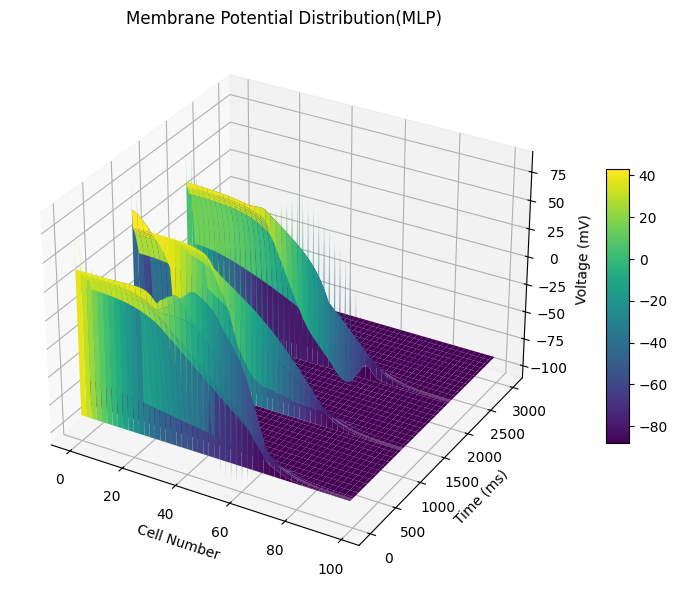

In [2]:
from simulator import *
from Ionic_current.Ord11 import Ord11_model
from PermanentConstants import Constants
import torch
from model import PIMLP
from Plot import Plot_fn

device = torch.device('cpu')
dtype = torch.float64
const = Constants(
            device=device,
            dtype=dtype,
            Ncell=100,
            bcl=1000,
            nbeats=3,
            dt_factor=10,
            stim_amplitude=50,
            GJ_coupling=7.35e-4
            )
D = 0.1 # mm^2/msec
dx = 0.1 #mm    
Ctot = const.parameters['Ctot']
Ggap = Ctot * D / dx**2
model = PIMLP(input_dim=1, hidden_dims=[32,64,32], output_dim=1)

coupling = MLPSimpleCoupling(const.parameters['Ncell'], Ggap, 30, model, model_name='MLP', device=device, dtype=dtype)
sim = CableSimulator(const, coupling, Ord11_model_fn=Ord11_model, device=device, dtype=dtype)
t_save, phi_save, I_save = sim.run()

Plot_fn.plot_2D_map(t_save, phi_save, title='Membrane Potential Distribution(MLP)', xlabel='Cell Number', ylabel='Time (ms)', zlabel='Voltage (mV)')

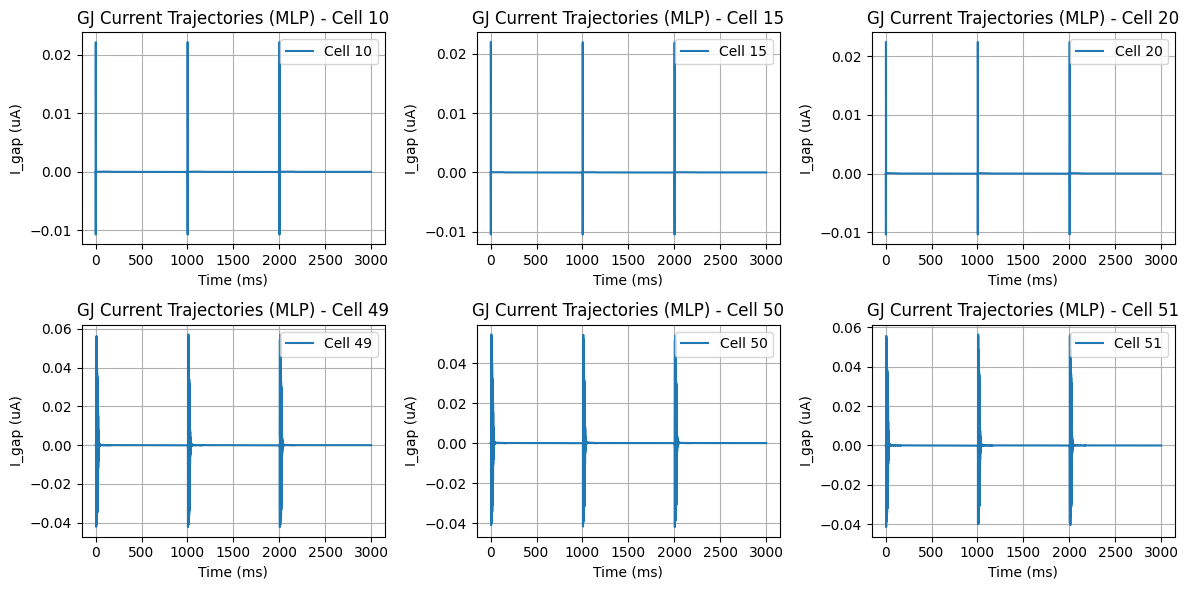

In [4]:
Plot_fn.plot_trajectory(t_save, I_save, idx = [10,15,20, 49, 50, 51], title='GJ Current Trajectories (MLP)', xlabel='Time (ms)', ylabel='I_gap (uA)')

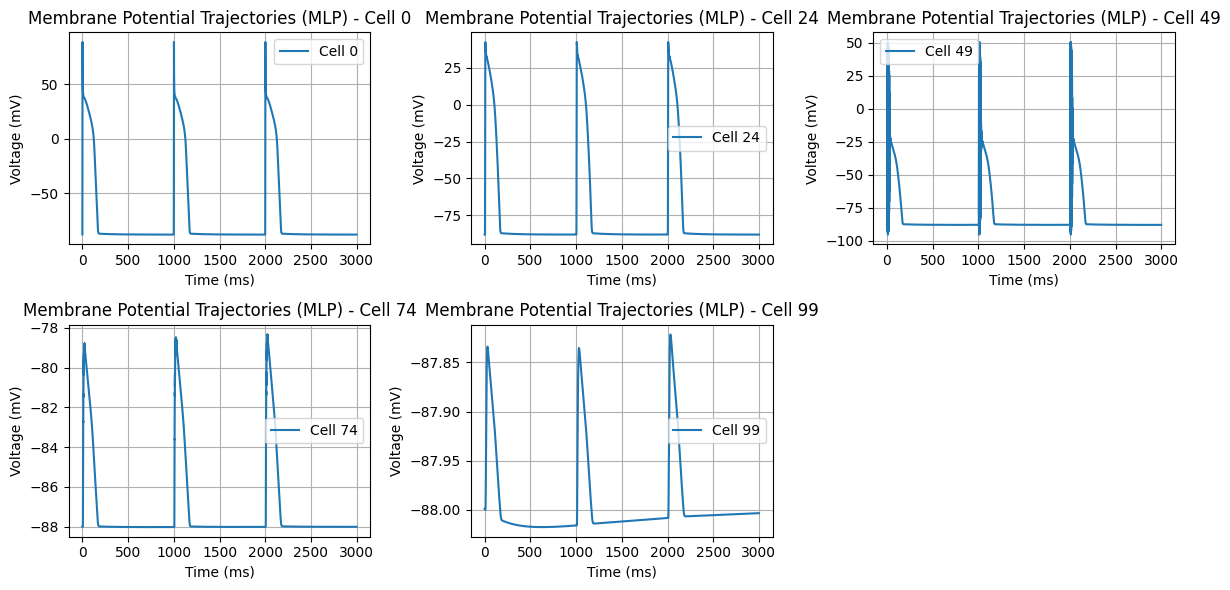

In [5]:
Plot_fn.plot_trajectory(t_save, phi_save, idx=[0, 24, 49, 74, 99], title='Membrane Potential Trajectories (MLP)', xlabel='Time (ms)', ylabel='Voltage (mV)')

## NN one junction with different BCL

time: 1000.00 ms, dt=0.01
Simulation time: 539.32 seconds


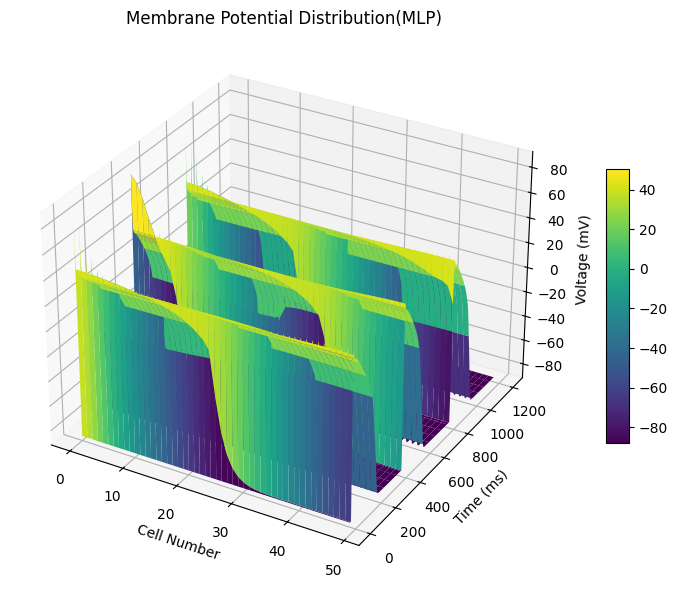

In [2]:
from simulator import *
from Ionic_current.Ord11 import Ord11_model
from PermanentConstants import Constants
import torch
from model import MLP

device = torch.device('cpu')
dtype = torch.float32
const = Constants(
            device=device,
            dtype=dtype,
            Ncell=50,
            bcl=400,
            nbeats=3,
            dt_factor=10,
            stim_amplitude=50,
            GJ_coupling=7.35e-4
            )
D = 0.1 # mm^2/msec
dx = 0.1 #mm    
Ctot = const.parameters['Ctot']
Ggap = Ctot * D / dx**2
model = mymodel = MLP(input_dim=2, hidden_dims=[32,32], output_dim=1)
coupling = MLPSimpleCoupling(const.parameters['Ncell'], Ggap, 24, model, model_name='MLP', device=device, dtype=dtype)
sim = CableSimulator(const, coupling, Ord11_model_fn=Ord11_model, device=device, dtype=dtype)
t_save, phi_save, I_save = sim.run()

from Plot import Plot_fn
Plot_fn.plot_2D_map(t_save, phi_save, title='Membrane Potential Distribution(MLP)', xlabel='Cell Number', ylabel='Time (ms)', zlabel='Voltage (mV)')

## MLP with multiple GJ and different BCL

time: 1000.00 ms, dt=0.01
Simulation time: 761.08 seconds


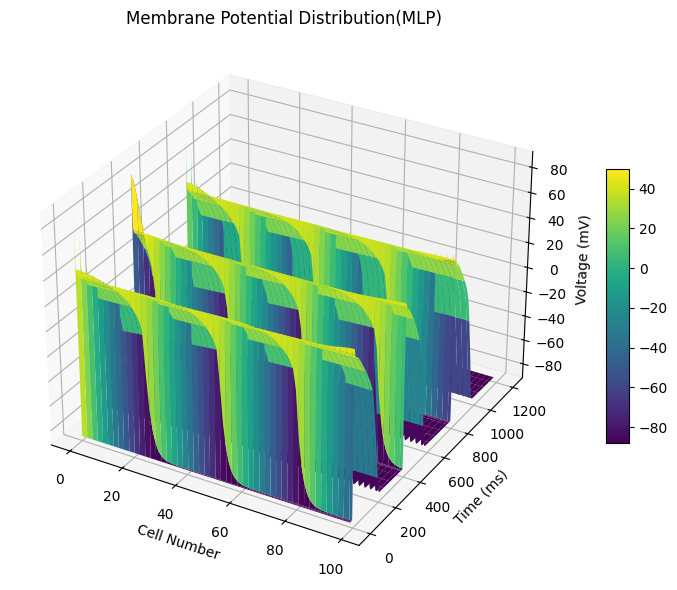

In [7]:
from simulator import *
from Ionic_current.Ord11 import Ord11_model
from PermanentConstants import Constants
import torch
from model import MLP

device = torch.device('cpu')
dtype = torch.float32
const = Constants(
            device=device,
            dtype=dtype,
            Ncell=100,
            bcl=400,
            nbeats=3,
            dt_factor=10,
            stim_amplitude=50,
            GJ_coupling=7.35e-4
            )
D = 0.1 # mm^2/msec
dx = 0.1 #mm    
Ctot = const.parameters['Ctot']
Ggap = Ctot * D / dx**2
model = MLP(input_dim=2, hidden_dims=[32,64,32], output_dim=1)
scaler = joblib.load('Scaler/MLP/SingleGJ_standard_scaler.pkl')
coupling = MLPSimpleCoupling(const.parameters['Ncell'], Ggap, 20, model, model_name='MLP', scaler=scaler, device=device, dtype=dtype)
sim = CableSimulator(const, coupling, Ord11_model_fn=Ord11_model, device=device, dtype=dtype)
t_save, phi_save, I_save = sim.run()

from Plot import Plot_fn
Plot_fn.plot_2D_map(t_save, phi_save, title='Membrane Potential Distribution(MLP)', xlabel='Cell Number', ylabel='Time (ms)', zlabel='Voltage (mV)')

## Test Normalization impact

time: 1000.00 ms, dt=0.001
time: 2000.00 ms, dt=0.001
time: 3000.00 ms, dt=0.001
time: 4000.00 ms, dt=0.001
Simulation time: 2500.78 seconds


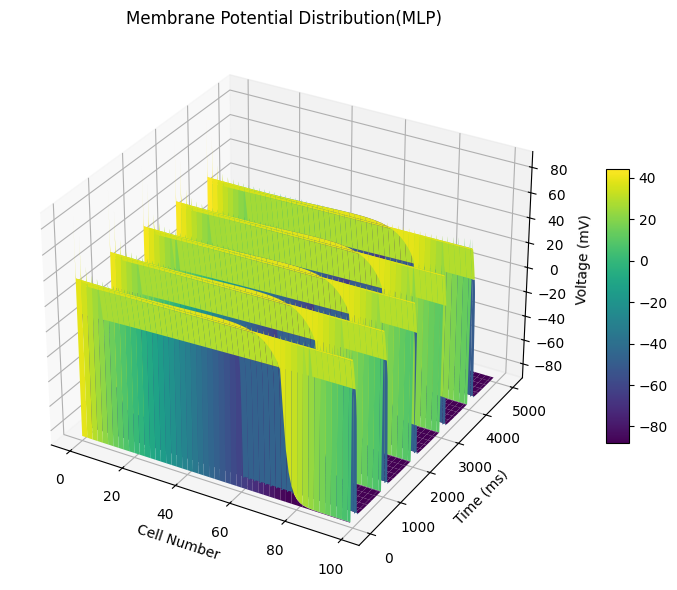

In [ ]:
from simulator import *
from Ionic_current.Ord11 import Ord11_model
from PermanentConstants import Constants
import torch
from model import MLP
import joblib
from Plot import Plot_fn

device = torch.device('cpu')
dtype = torch.float32
const = Constants(
            device=device,
            dtype=dtype,
            Ncell=100,
            bcl=1000,
            nbeats=5,
            dt_factor=10,
            stim_amplitude=50,
            GJ_coupling=7.35e-4
            )
D = 0.1 # mm^2/msec
dx = 0.1 #mm    
Ctot = const.parameters['Ctot']
Ggap = Ctot * D / dx**2
model = MLP(input_dim=2, hidden_dims=[32,64,32], output_dim=1)
scaler = joblib.load('Scaler/MLP/SingleGJ_standard_scaler.pkl')
coupling = MLPSimpleCoupling(const.parameters['Ncell'], Ggap, 20, model, model_name='MLP', scaler=scaler, device=device, dtype=dtype)
sim = CableSimulator(const, coupling, Ord11_model_fn=Ord11_model, device=device, dtype=dtype)
t_save, phi_save, I_save = sim.run()

Plot_fn.plot_2D_map(t_save, phi_save, title='Membrane Potential Distribution(MLP)', xlabel='Cell Number', ylabel='Time (ms)', zlabel='Voltage (mV)')

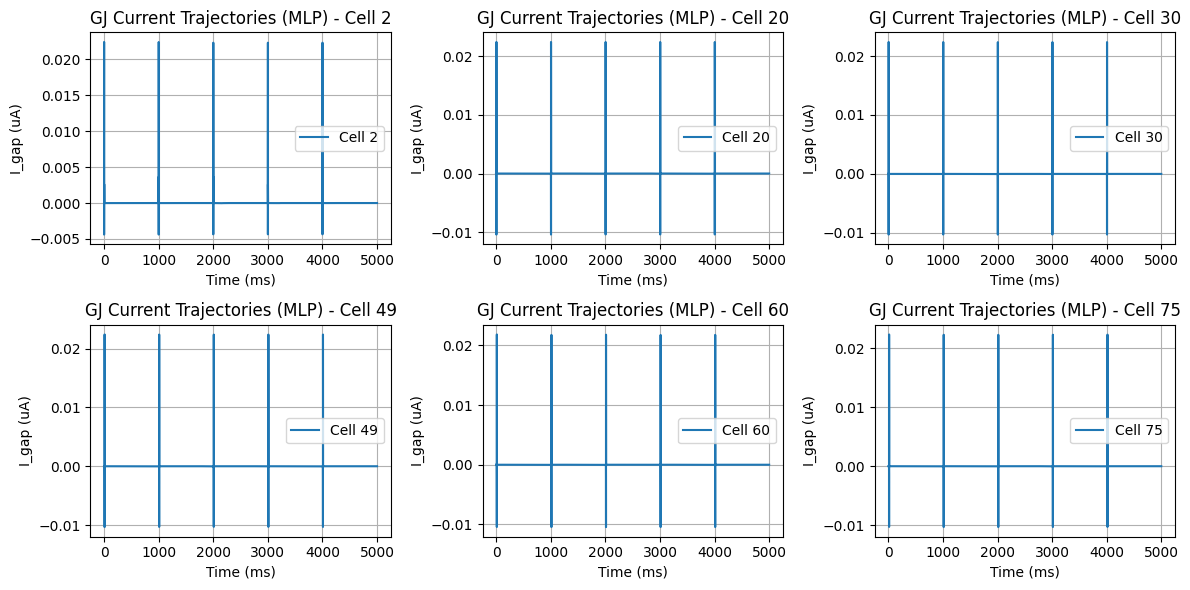

In [4]:
Plot_fn.plot_trajectory(t_save, I_save, idx = [2, 20, 30, 49, 60, 75], title='GJ Current Trajectories (MLP)', xlabel='Time (ms)', ylabel='I_gap (uA)')